In [2]:
import numpy as np
import diffraction as diff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time as time

In [15]:
# use thetax and thetay to adjust initial orientation of the sample
thetax=np.pi/2
thetay=0.4
hkl_dimension=5

# sigma_theta, if you need a small number for single crystal, input~0.01, if you need infinity, input~1000
sigma1=0.03

# sigma_phi
sigma2=0.03 

# sigma_r, use this to tune the peak linewidth
sigma3=0.1

# settings for imagine plane
resolutionx=500
qxymax=20
qzmax=20

resolutionz=int(resolutionx/qxymax*qzmax)
gridx,gridz=np.meshgrid(np.linspace(-qxymax,qxymax,resolutionx),np.linspace(-qzmax,qzmax,resolutionz))

In [16]:
# read crystal structure(POSCAR file which can be converted easily from cif)
# need to change the atom(line 7) to atomic number (Pb -> 82)
a1,a2,a3,positions=diff.read_poscar("C:\\Users\z4794\Desktop\graphite.vasp") # example (graphite)
Bpeaks = diff.Bragg_peaks(a1,a2,a3,positions,thetax,thetay,hkl_dimension)

In [19]:
t1_start = time.process_time()
# calculated GIWAXS pattern
III=diff.intensity(gridx,gridz,Bpeaks,sigma1,sigma2,sigma3,hkl_dimension)
t1_stop = time.process_time()
print('cpu time =')
print(t1_stop-t1_start,'s')

cpu time =
35.6875 s


Text(0.5, 1.0, 'Diffraction')

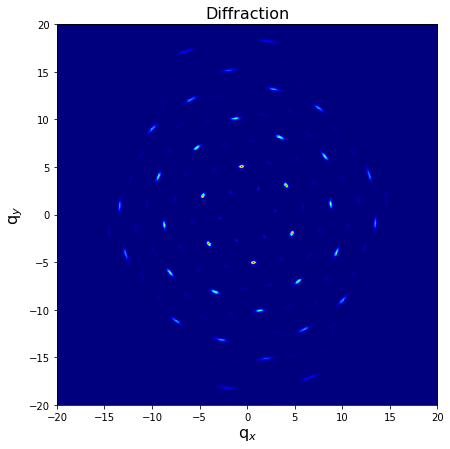

In [20]:
# make the plot
II1=np.log(III+1)
II1=III
fig,ax=plt.subplots(figsize=(7,7))

ax.imshow(II1, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[-qxymax, qxymax, -qzmax, qzmax],
               vmax=II1.max(), vmin=II1.min())
ax.set_xlabel('q$_{x}$',fontsize=16)
ax.set_ylabel('q$_{y}$',fontsize=16)
ax.set_title('Diffraction',fontsize=16)
# fig.set_size_inches([10,10])